In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import io

In [25]:
qpcr_results = pd.read_excel("./qpcr-data/2020324 LOD Study 1.xlsx", sheet_name="Results", skiprows=42, na_values=['Undetermined'])

In [26]:
ncov = qpcr_results[(qpcr_results['Reporter'] == 'FAM') & qpcr_results['Sample Name'].str.contains('nCoV')]

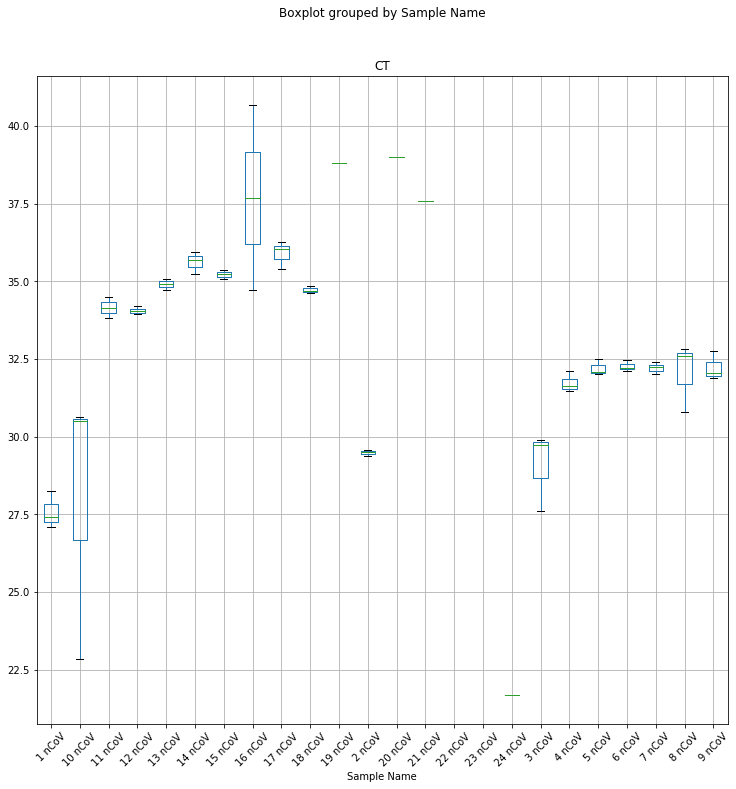

In [38]:
ncov.boxplot(by='Sample Name', column='CT', rot=45, figsize=(12,12))

In [40]:
sc = qpcr_results[qpcr_results['Sample Name'].str.contains('PCD')]

In [51]:
pcd = [('PCD 1', 1e6)]
for i in range(7):
    pcd.append(('PCD {}'.format(i+2), pcd[i][1] / 10))
    
pcd = pd.DataFrame(pcd, columns = ['Sample Name', 'Concentration'])

In [55]:
sc = sc.merge(pcd)

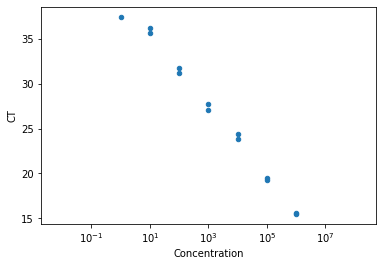

In [62]:
sc.plot.scatter(x='Concentration', y='CT', logx=True)

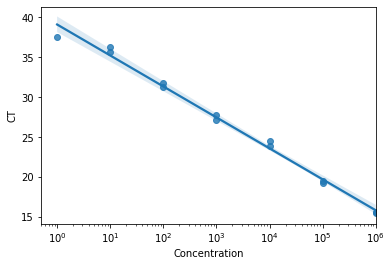

In [64]:
ax = sns.regplot(data=sc, x='Concentration', y='CT', logx=True)
ax.set_xscale('log')

In [71]:
sample_data = '''
Samples	NP Sample	"Spike"	Control	"Control Conc"	"Volume
(uL)"
1	AJ	1,000	PCD 1	2.00E+05	5
2	CC	1,000	PCD 1	2.00E+05	5
3	MM	1,000	PCD 1	2.00E+05	5
4	AJ	200	PCD 1	2.00E+05	1
5	CC	200	PCD 1	2.00E+05	1
6	MM	200	PCD 1	2.00E+05	1
7	AJ	100	PCD 2	2.00E+04	5
8	CC	100	PCD 2	2.00E+04	5
9	MM	100	PCD 2	2.00E+04	5
10	AJ	50	PCD 2	2.00E+04	2.5
11	CC	50	PCD 2	2.00E+04	2.5
12	MM	50	PCD 2	2.00E+04	2.5
13	AJ	20	PCD 2	2.00E+04	1
14	CC	20	PCD 2	2.00E+04	1
15	MM	20	PCD 2	2.00E+04	1
16	AJ	10	PCD 3	2.00E+03	5
17	CC	10	PCD 3	2.00E+03	5
18	MM	10	PCD 3	2.00E+03	5
19	AJ	2	PCD 3	2.00E+03	1
20	CC	2	PCD 3	2.00E+03	1
21	MM	2	PCD 3	2.00E+03	1
22	AJ	0	NEG	0	0
23	CC	0	NEG	0	0
24	MM	0	NEG	0	0'''

sample_data = pd.read_table(io.StringIO(sample_data))

In [69]:
sample_data['Sample Name'] = sample_data['Samples']

TypeError: string indices must be integers

In [73]:
sample_data['Samples']

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')